<a href="https://colab.research.google.com/github/koshin37/kadai2/blob/main/L1vsL2_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

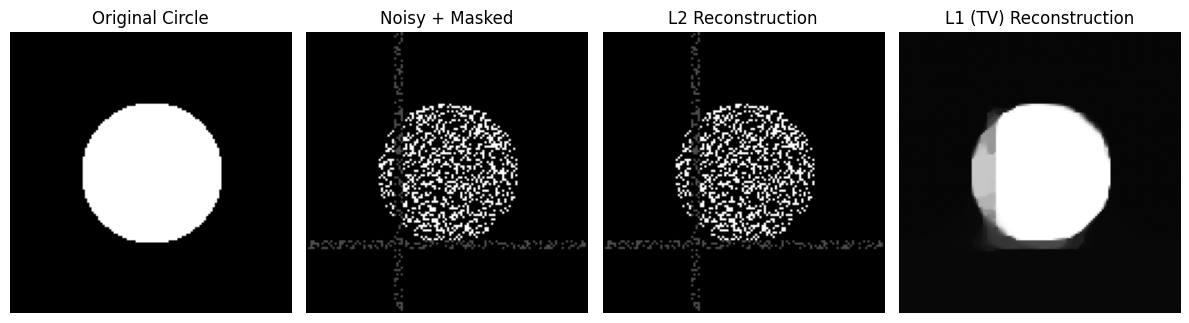

In [13]:
import numpy as np
import matplotlib.pyplot as plt
import cvxpy as cp
from skimage.draw import disk

# ============================
# 1. 円画像生成
# ============================
def generate_circle_image(size=128):
    img = np.zeros((size, size), dtype=float)
    rr, cc = disk((size//2, size//2), radius=size//4)
    img[rr, cc] = 1.0
    return img

# ============================
# 2. ノイズ追加（縦線・横線）
# ============================
def add_line_noise(img, v_step=16, h_step=20, thickness=2):
    noisy = img.copy()
    h, w = img.shape

    # 縦線ノイズ
    for col in range(40,43):
        noisy[:, col:col+thickness] = 0.3

    # 横線ノイズ
    for row in range(95,98):
        noisy[row:row+thickness, :] = 0.3

    return noisy

# ============================
# 3. マスク作成（欠損 70%）
# ============================
def create_mask(img, keep_ratio=0.3):
    np.random.seed(0)
    mask = np.random.rand(*img.shape) < keep_ratio
    return mask

# ============================
# 4. L2 / L1 復元
# ============================
def reconstruct_L2_L1(y, mask, lam=0.5):
    x_l2 = cp.Variable(y.shape)
    prob_l2 = cp.Problem(cp.Minimize(cp.sum_squares(cp.multiply(mask, x_l2 - y))))
    prob_l2.solve()
    img_l2 = x_l2.value

    x_l1 = cp.Variable(y.shape)
    prob_l1 = cp.Problem(cp.Minimize(cp.sum_squares(cp.multiply(mask, x_l1 - y)) + lam * cp.tv(x_l1)))
    prob_l1.solve()
    img_l1 = x_l1.value

    return img_l2, img_l1

# ============================
# 5. 実行
# ============================
img = generate_circle_image(128)
img_noisy = add_line_noise(img, v_step=16, h_step=20, thickness=2)
mask = create_mask(img_noisy, keep_ratio=0.3)
y = img_noisy * mask

img_l2, img_l1 = reconstruct_L2_L1(y, mask, lam=0.5)

# ============================
# 6. 結果表示
# ============================
plt.figure(figsize=(12, 4))

plt.subplot(1, 4, 1)
plt.title("Original Circle")
plt.imshow(img, cmap="gray")
plt.axis("off")

plt.subplot(1, 4, 2)
plt.title("Noisy + Masked")
plt.imshow(y, cmap="gray")
plt.axis("off")

plt.subplot(1, 4, 3)
plt.title("L2 Reconstruction")
plt.imshow(img_l2, cmap="gray")
plt.axis("off")

plt.subplot(1, 4, 4)
plt.title("L1 (TV) Reconstruction")
plt.imshow(img_l1, cmap="gray")
plt.axis("off")

plt.tight_layout()
plt.show()
